### Stock Forecaster

In [1]:
from lib.forecast import StockForecaster
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sf = StockForecaster(epochs=2000, gpu_device="mps")
sf.load("spydata.csv")
sf.prepare()
sf.create_model()

In [3]:
sf.raw_data.head(4)

,Open,High,Low,Close,Volume
Date,,,,,
2015-06-22,211.910004,212.589996,211.639999,211.889999,70696000
2015-06-23,212.139999,212.440002,211.570007,212.039993,68476800
2015-06-24,211.720001,212.169998,210.470001,210.500000,92307300
2015-06-25,211.100006,211.250000,209.770004,209.860001,97107400


<Axes: xlabel='Date'>

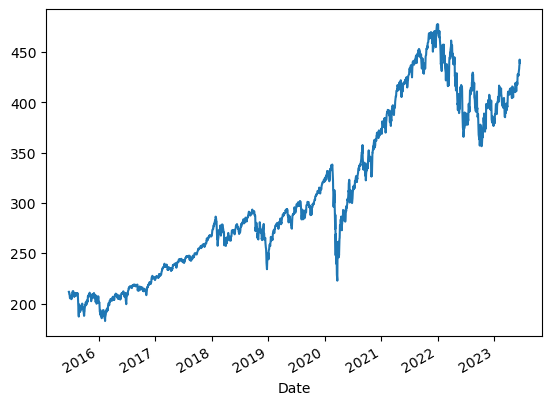

In [4]:
sf.raw_data["Close"].plot()

#### Train Model

In [5]:
loss_data, test_loss_data = sf.train()

Epoch: 0, train loss: 0.25753873586654663, test loss: 0.52048659324646
Epoch: 100, train loss: 0.008340184576809406, test loss: 0.010953910648822784
Epoch: 200, train loss: 0.002856823615729809, test loss: 0.005679056514054537
Epoch: 300, train loss: 0.0023956596851348877, test loss: 0.00527520477771759
Epoch: 400, train loss: 0.002252752659842372, test loss: 0.005085097160190344
Epoch: 500, train loss: 0.002175810281187296, test loss: 0.004949340596795082
Epoch: 600, train loss: 0.002125907689332962, test loss: 0.004840765614062548
Epoch: 700, train loss: 0.002075725235044956, test loss: 0.004846380557864904
Epoch: 800, train loss: 0.002021773951128125, test loss: 0.0048339092172682285
Epoch: 900, train loss: 0.0019800567533820868, test loss: 0.0048491391353309155
Epoch: 1000, train loss: 0.0019424781203269958, test loss: 0.004832378588616848
Epoch: 1100, train loss: 0.0019014253048226237, test loss: 0.004791396204382181
Epoch: 1200, train loss: 0.0018595558358356357, test loss: 0.004

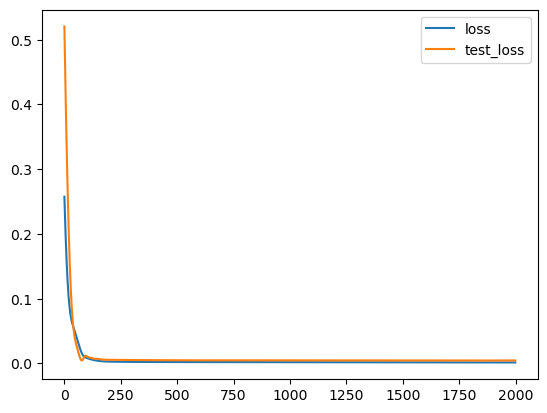

In [6]:
plt.plot(loss_data, label="loss")
plt.plot(test_loss_data, label="test_loss")
plt.legend()
plt.show()

#### Validate

In [134]:
train_data = sf.ss.inverse_transform(sf.X_train_tensors.data.numpy()[:,0,:])[:,0]
test_data = sf.ss.inverse_transform(sf.X_test_tensors.data.numpy()[:,0])

train_predict = sf.lstm(sf.X_test_tensors) 
data_predict = sf.mm.inverse_transform(train_predict.data.numpy())

len(data_predict), len(train_predict), len(test_data), len(train_data), sf.train_samples

(201, 201, 201, 1663, 1811)

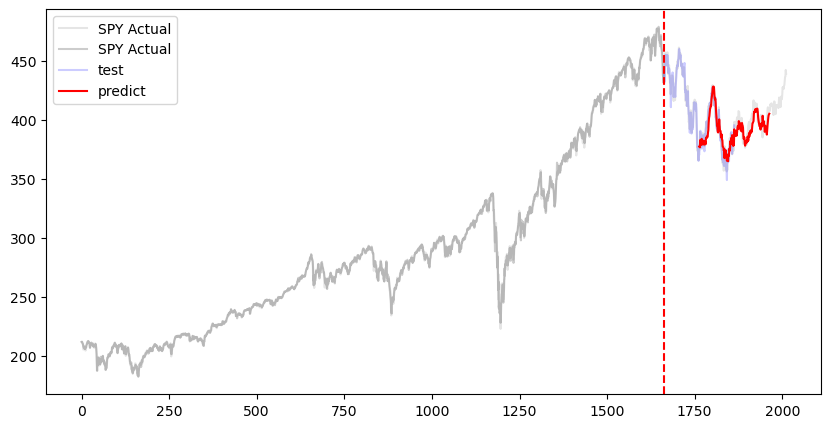

In [147]:
tdata_len = len(train_data)

plt.figure(figsize=(10,5)) #plotting

plt.plot(sf.mm.inverse_transform(sf.y_train), "k", label="SPY Actual", alpha=0.1)

plt.plot(train_data, "k", label="SPY Actual", alpha=0.2)

td = [None] * tdata_len
td.extend(test_data[:,0])
plt.plot(td, "b", label="test", alpha=0.2)

dp = [None] * (tdata_len + 100)
dp.extend(data_predict[:,0])
plt.plot(dp, "r", label="predict")

plt.axvline(x=len(train_data), c='r', linestyle='--') # size of the training set

plt.legend()
plt.show()

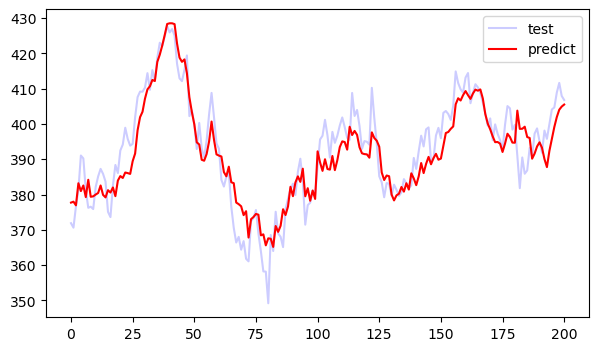

In [9]:
plt.figure(figsize=(7,4)) #plotting

td = test_data[:,0]
plt.plot(td, "b", label="test", alpha=0.2)

dp = data_predict[:,0]
plt.plot(dp, "r", label="predict")

plt.legend()
plt.show()

### Future Price

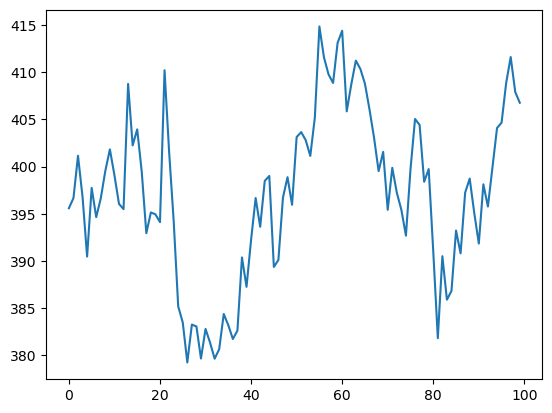

In [10]:
ds = sf.X_test_tensors[-1].unsqueeze(0)
plt.plot(sf.ss.inverse_transform(ds.detach().numpy()[0])[:, 0])

In [22]:
sf.raw_data.shape, sf.total_samples, sf.train_samples, sf.test_samples, (sf.train_samples + sf.test_samples)

((2012, 5), 2012, 1811, 201, 2012)

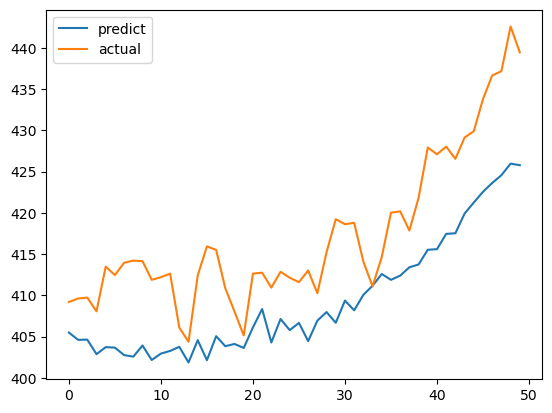

In [148]:
test_predict = sf.lstm(sf.X_test_tensors[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = sf.mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = sf.y_test_tensors[-1].detach().numpy() # last sample again
test_target = sf.mm.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()

plt.plot(test_predict, label="predict")
plt.plot(test_target, label="actual")
plt.legend()
plt.show()